In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import escher
from cobra.flux_analysis.phenotype_phase_plane import production_envelope, add_envelope

In [2]:
from cobra.io import read_sbml_model
model = read_sbml_model('../course-materials/data/iML1515.xml')

In [3]:
for metabolite in model.metabolites.query('L-Serine', 'name'):
    print(metabolite.id)

ser__L_c
ser__L_p
ser__L_e


Reactions w. L-Serin in different compartments

In [4]:
ser_reac = list()
for reaction in model.metabolites.ser__L_c.reactions:
    if reaction.id != 'BIOMASS_Ec_iML1515_core_75p37M' and reaction.id != 'BIOMASS_Ec_iML1515_WT_75p37M':
        ser_reac.append(reaction)
        print(reaction)        

SERAT: accoa_c + ser__L_c <=> acser_c + coa_c
SERD_L: ser__L_c --> nh4_c + pyr_c
SERASr: atp_c + h_c + ser__L_c <=> ppi_c + seramp_c
PSSA180: cdpdodecg_c + ser__L_c --> cmp_c + h_c + ps180_c
LSERDHr: nadp_c + ser__L_c <=> 2amsa_c + h_c + nadph_c
GPDDA3: g3ps_c + h2o_c --> glyc3p_c + h_c + ser__L_c
SERtpp: ser__L_c --> ser__L_p
PSSA141: cdpdtdec7eg_c + ser__L_c --> cmp_c + h_c + ps141_c
PSSA160: cdpdhdecg_c + ser__L_c --> cmp_c + h_c + ps160_c
PSSA161: cdpdhdec9eg_c + ser__L_c --> cmp_c + h_c + ps161_c
PSP_L: h2o_c + pser__L_c --> pi_c + ser__L_c
TRPS1: 3ig3p_c + ser__L_c --> g3p_c + h2o_c + trp__L_c
SERt2rpp: h_p + ser__L_p --> h_c + ser__L_c
SERt4pp: na1_p + ser__L_p --> na1_c + ser__L_c
PSSA140: cdpdtdecg_c + ser__L_c --> cmp_c + h_c + ps140_c
DHBSH: 23dhbzs_c + h2o_c --> 23dhb_c + ser__L_c
GHMT2r: ser__L_c + thf_c <=> gly_c + h2o_c + mlthf_c
PSSA120: cdpdddecg_c + ser__L_c --> cmp_c + h_c + ps120_c
PSSA181: cdpdodec11eg_c + ser__L_c --> cmp_c + h_c + ps181_c
TRPS2: indole_c + ser__L

In [5]:
for reaction in model.metabolites.ser__L_p.reactions:
    ser_reac.append(reaction)
    print(reaction)

SERt4pp: na1_p + ser__L_p --> na1_c + ser__L_c
GPDDA3pp: g3ps_p + h2o_p --> glyc3p_p + h_p + ser__L_p
SERt2rpp: h_p + ser__L_p --> h_c + ser__L_c
SERtpp: ser__L_c --> ser__L_p
PSP_Lpp: h2o_p + pser__L_p --> pi_p + ser__L_p
SERtex: ser__L_e <=> ser__L_p


In [6]:
for reaction in model.metabolites.ser__L_e.reactions:
    ser_reac.append(reaction)
    print(reaction)

EX_ser__L_e: ser__L_e --> 
SERtex: ser__L_e <=> ser__L_p


In [7]:
akg_c_reac = []
for reaction in model.metabolites.akg_c.reactions:
        akg_c_reac.append(reaction)
        print(reaction)             

GLUDy: glu__L_c + h2o_c + nadp_c <=> akg_c + h_c + nadph_c + nh4_c
LEUTAi: 4mop_c + glu__L_c --> akg_c + leu__L_c
PTRCTA: akg_c + ptrc_c --> 4abutn_c + glu__L_c
PSERT: 3php_c + glu__L_c --> akg_c + pser__L_c
TYRTA: akg_c + tyr__L_c <=> 34hpp_c + glu__L_c
ASPTA: akg_c + asp__L_c <=> glu__L_c + oaa_c
SOTA: akg_c + sucorn_c --> glu__L_c + sucgsa_c
SEPHCHCS: akg_c + h_c + ichor_c --> 2sephchc_c + co2_c
TAUDO: akg_c + o2_c + taur_c --> aacald_c + co2_c + h_c + so3_c + succ_c
ICDHyr: icit_c + nadp_c <=> akg_c + co2_c + nadph_c
VALTA: akg_c + val__L_c <=> 3mob_c + glu__L_c
AKGt2rpp: akg_p + h_p <=> akg_c + h_c
ILETA: akg_c + ile__L_c <=> 3mop_c + glu__L_c
OHPBAT: glu__L_c + ohpb_c <=> akg_c + phthr_c
CYSTA: akg_c + cys__L_c --> glu__L_c + mercppyr_c
UDPKAAT: glu__L_c + udpLa4o_c <=> akg_c + udpLa4n_c
GLUSy: akg_c + gln__L_c + h_c + nadph_c --> 2.0 glu__L_c + nadp_c
ABTA: 4abut_c + akg_c --> glu__L_c + sucsal_c
ACOTA: acorn_c + akg_c <=> acg5sa_c + glu__L_c
TDPAGTA: dtdp4d6dg_c + glu__L_c --> 

In [8]:
model.metabolites.akg_c.reactions

frozenset({<Reaction ABTA at 0x7f96311aa2e8>,
           <Reaction ACOTA at 0x7f9630e882e8>,
           <Reaction AHGDx at 0x7f9630d993c8>,
           <Reaction AKGDH at 0x7f9630eee748>,
           <Reaction AKGt2rpp at 0x7f9630d2ff98>,
           <Reaction ALATA_L at 0x7f963134fba8>,
           <Reaction ARHGDx at 0x7f962fd44be0>,
           <Reaction ASPTA at 0x7f96312dd4a8>,
           <Reaction CYSTA at 0x7f962fd44a20>,
           <Reaction GLUDy at 0x7f9630742400>,
           <Reaction GLUSy at 0x7f9630684a90>,
           <Reaction HSTPT at 0x7f96306f9710>,
           <Reaction ICDHyr at 0x7f9631327550>,
           <Reaction ILETA at 0x7f96313065f8>,
           <Reaction LEUTAi at 0x7f96312da438>,
           <Reaction OHPBAT at 0x7f96311c0a20>,
           <Reaction PHETA1 at 0x7f9630edaf60>,
           <Reaction PSERT at 0x7f9630e48048>,
           <Reaction PTRCTA at 0x7f9631335048>,
           <Reaction SDPTA at 0x7f9630fa2390>,
           <Reaction SEPHCHCS at 0x7f962fdd9cc0>,


In [9]:
print(model.objective)

Maximize
1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685


### Maximising Biomass objective function
### Writing flux data to CSV file for Escher visualisation

In [10]:
WT_solution = model.optimize()
# Non_zero_fluxes = solution.fluxes[solution.fluxes !=0]
type(WT_solution.fluxes)
WT_solution.fluxes
df = pd.DataFrame(WT_solution.fluxes)
df.to_csv('WT_solution.fluxes.csv')

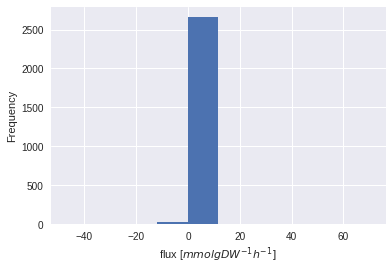

In [11]:
# Visualisation of fluxes as a histogram
fig = WT_solution.fluxes.hist()
fig.set_xlabel('flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');

In [12]:
# Max Serine production. See below
 # with model:
   # model.objective = model.reactions.EX_ser__L_e
    #print(model.optimize().objective_value)
model.medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}

In [13]:
# Serine prod. and yield on std. medium w. glc  ... From Exc. 6

with model:
    #medium['EX_glc__D_e'] = 0
    #medium['EX_ac_e'] = 10
    #model.medium = medium
    model.objective = model.reactions.EX_ser__L_e
    ser_production = model.optimize().objective_value
    print("Max. L-serine production [mmol gDW^-1 h^-1]:", ser_production)
    print("Theoretical max. yield [mmol_L-ser / mmol_glc]:", ser_production / (-1*model.reactions.EX_glc__D_e.flux))
    SerMax_solution = model.optimize()
    df1 = pd.DataFrame(SerMax_solution.fluxes)
    df1.to_csv('SerMax_solution.fluxes.csv')

Max. L-serine production [mmol gDW^-1 h^-1]: 20.625882352941172
Theoretical max. yield [mmol_L-ser / mmol_glc]: 2.0625882352941174


In [14]:
#ppp_ser = production_envelope(model,
#                    reactions=[model.reactions.EX_ser__L_e],
 #                   objective=model.reactions.EX_ser__L_e)

In [15]:
#ppp_ser

In [16]:
 #Metabolites to L-serine

# model.metabolites.get_by_id('3pg_c')
# model.metabolites.get_by_id('3php_c')
# model.metabolites.get_by_id('pser__L_c')
model.metabolites.get_by_id('akg_c')

Metabolite identifier,akg_c
Name,2-Oxoglutarate
Memory address,0x07f9631c92908
Formula,C5H4O5
Compartment,c
In 28 reaction(s),"GLUDy, LEUTAi, PTRCTA, PSERT, TYRTA, ASPTA, SOTA, SEPHCHCS, TAUDO, ICDHyr, VALTA, AKGt2rpp, ILETA, OHPBAT, CYSTA, UDPKAAT, GLUSy, ABTA, ACOTA, TDPAGTA, HSTPT, SHGO, AKGDH, PHETA1, SDPTA, ALATA_L, A..."


In [17]:
# Cytosol => Periplasm => EX
# SERtpp   =>  SERtex  =>

# Reactions to L-serine

# model.reactions.PGCD   # 3pg_c + nad_c --> 3php_c + h_c + nadh_c
# model.reactions.PSERT  # 3php_c + glu__L_c --> akg_c + pser__L_c
# model.reactions.PSP_L    # h2o_c + pser__L_c --> pi_c + ser__L_c

# Reactions from L-serine

#model.reactions.GHMT2r   GHMT2r: ser__L_c + thf_c <=> gly_c + h2o_c + mlthf_c
#model.reactions.LSERDHr
#model.reactions.SERD_L  SERD_L: ser__L_c --> nh4_c + pyr_c
#model.reactions.TRPS1
#model.reactions.TRPS2
From_ser_Rxn = [model.reactions.GHMT2r, model.reactions.LSERDHr, model.reactions.SERD_L, model.reactions.TRPS1, model.reactions.TRPS2]
for rxn in From_ser_Rxn:
    print(rxn) 

GHMT2r: ser__L_c + thf_c <=> gly_c + h2o_c + mlthf_c
LSERDHr: nadp_c + ser__L_c <=> 2amsa_c + h_c + nadph_c
SERD_L: ser__L_c --> nh4_c + pyr_c
TRPS1: 3ig3p_c + ser__L_c --> g3p_c + h2o_c + trp__L_c
TRPS2: indole_c + ser__L_c --> h2o_c + trp__L_c


In [18]:
# Byproduct Reaction 
# model.reactions.AHGDx.annotation - Promiscuous reaction resulting in hydroxyglutarate byproduct formation- 1.1.1.399
model.reactions.AHGDx


Reaction identifier,AHGDx
Name,(S)-alpha-hydroxyglutarate dehydrogenase
Memory address,0x07f9630d993c8
Stoichiometry,S2hglut_c + nad_c <=> akg_c + h_c + nadh_c (S)-2-Hydroxyglutarate + Nicotinamide adenine dinucleotide <=> 2-Oxoglutarate + H+ + Nicotinamide adenine dinucleotide - reduced
GPR,b2913
Lower bound,-1000.0
Upper bound,1000.0


## Flux variability Analysis

Calculate all flux ranges of all reactions in the model

In [19]:
from cobra.flux_analysis import flux_variability_analysis

In [ ]:
result = flux_variability_analysis(model,loopless= True)
result

In [ ]:
type(result)

In [ ]:
result.describe()

Writing Absolute flux differences to CSV

In [ ]:
df3 = abs(result.maximum - result.minimum)
df3.fobje
# find reactions showing up in red, these are futile cycles
sum(abs(result.maximum - result.minimum))

In [ ]:
df3.value_counts(sort=True)

In [ ]:
model.objective

In [ ]:
from cameo.flux_analysis.analysis import phenotypic_phase_plane
production_envelope = phenotypic_phase_plane(model, 
                                             variables=[model.reactions.BIOMASS_Ecoli_core_w_GAM],
                                             objective=model.metabolites.succ_e)
production_envelope.plot(height=400)